In [1]:
import pandas as pd
import numpy as np
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [2]:
df = pd.read_csv("diamonds.csv")
df.head(2)

carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31

In [4]:
posthoc = pairwise_tukeyhsd(df["price"], df["cut"])
print(posthoc)

     Multiple Comparison of Means - Tukey HSD, FWER=0.05      
 group1   group2   meandiff p-adj    lower      upper   reject
--------------------------------------------------------------
   Fair      Good -429.8933 0.0015  -740.4567 -119.3299   True
   Fair     Ideal -901.2158  0.001 -1180.5785 -621.8531   True
   Fair   Premium  225.4999  0.195   -59.2739  510.2738  False
   Fair Very Good -376.9979 0.0031  -663.8694  -90.1263   True
   Good     Ideal -471.3225  0.001   -642.367 -300.2779   True
   Good   Premium  655.3933  0.001   475.6466  835.1399   True
   Good Very Good   52.8954    0.9  -130.1565  235.9474  False
  Ideal   Premium 1126.7157  0.001  1008.8058 1244.6257   True
  Ideal Very Good  524.2179  0.001   401.3281  647.1078   True
Premium Very Good -602.4978  0.001  -737.2366 -467.7591   True
--------------------------------------------------------------


In [7]:
df.loc[df["cut"] == "Good", "price"].mean() - df.loc[df["cut"] == "Fair", "price"].mean()

-429.89331228334913

In [13]:
iris = pd.read_excel("iris_xlsx.xlsx")
iris.head()

Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

In [15]:
iris_melt = iris.iloc[:, :3].melt()
iris_melt

variable  value
0    Sepal.Length    5.1
1    Sepal.Length    4.9
2    Sepal.Length    4.7
3    Sepal.Length    4.6
4    Sepal.Length    5.0
..            ...    ...
445  Petal.Length    5.2
446  Petal.Length    5.0
447  Petal.Length    5.2
448  Petal.Length    5.4
449  Petal.Length    5.1

[450 rows x 2 columns]

In [17]:
iris_melt["variable"].value_counts()

Sepal.Length    150
Sepal.Width     150
Petal.Length    150
Name: variable, dtype: int64

statsmodels의 경우 (수치형) 종속변수 1개, (명목형) 독립변수 1개가 필요함. 즉, ols() 함수에 할당되는 데이터프레임의 경우 최소 두 개 이상의 변수가 존재해야 함.

In [11]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
model = ols("value ~ C(variable)", data = iris_melt).fit()
anova_lm(model)

df      sum_sq     mean_sq           F        PR(>F)
C(variable)    2.0  630.067244  315.033622  236.751633  7.657188e-71
Residual     447.0  594.800667    1.330650         NaN           NaN

In [16]:
post_hoc = pairwise_tukeyhsd(iris_melt["value"], iris_melt["variable"])
print(post_hoc)

      Multiple Comparison of Means - Tukey HSD, FWER=0.05      
   group1       group2    meandiff p-adj  lower   upper  reject
---------------------------------------------------------------
Petal.Length Sepal.Length   2.0853 0.001  1.7721  2.3986   True
Petal.Length  Sepal.Width  -0.7007 0.001 -1.0139 -0.3874   True
Sepal.Length  Sepal.Width   -2.786 0.001 -3.0992 -2.4728   True
---------------------------------------------------------------


In [18]:
post_hoc.summary()

<class 'statsmodels.iolib.table.SimpleTable'>

In [20]:
df = pd.read_csv("diamonds.csv")
df.head(2)

carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31

In [24]:
formula = "price ~ C(cut) * C(clarity)"
model = ols(formula, data = df).fit()
anova_lm(model)

df        sum_sq       mean_sq           F         PR(>F)
C(cut)                 4.0  1.104175e+10  2.760436e+09  180.157428  1.277078e-153
C(clarity)             7.0  1.890981e+10  2.701402e+09  176.304579  2.918210e-259
C(cut):C(clarity)     28.0  2.646561e+09  9.452003e+07    6.168766   9.645200e-23
Residual           53900.0  8.258750e+11  1.532236e+07         NaN            NaN

주 효과는 cut변수와 clarity가 있으며, 각각의 p-value는 유의수준 5%보다 작기 때문에 주 효과가 있으며(통계적으로 유의), 교호작용(상호작용) 효과는 주 효과와 마찬가지로 p-value가 유의수준 5% 보다 작기 때문에 두 독립변수간 교호작용 효과가 있다(통계적으로 유의)고 할 수 있다.

특정 값에서 특정 문구들이 포함되었는지를 찾을 수 있는 함수

In [25]:
ser = pd.Series(["aaa", "abc", "ccc"])
ser

0    aaa
1    abc
2    ccc
dtype: object

In [26]:
ser.str.contains(pat = "b")

0    False
1     True
2    False
dtype: bool

In [27]:
ser.str.contains(pat = "^c") # c로 시작하는
ser.str.contains(pat = "a$") # a로 끝나는

0    False
1    False
2     True
dtype: bool

하나의 컬럼에서... A\~G까지는 1그룹으로, H\~P까지는 2그룹으로, 나머지는 3그룹으로 하라고 하면... 이럴 때 한번에 쓸 수 있는 함수

A) 별도의 데이터프레임을 생성한 후 join

In [29]:
ser = pd.Series(range(10))
ser[:3]

0    0
1    1
2    2
dtype: int64

In [32]:
pd.cut(ser, bins = [0, 3, 6, 10], right = False)

0     [0, 3)
1     [0, 3)
2     [0, 3)
3     [3, 6)
4     [3, 6)
5     [3, 6)
6    [6, 10)
7    [6, 10)
8    [6, 10)
9    [6, 10)
dtype: category
Categories (3, interval[int64]): [[0, 3) < [3, 6) < [6, 10)]

In [33]:
ord("A")

65

In [34]:
aws = pd.read_csv("AWS_sample.txt", sep = "#")
aws.head(2)

AWS_ID             TM    TA  Wind X.
0     108  2016-07-01 00  24.2   2.3  =
1     108  2016-07-01 01  24.3   2.3  =

In [35]:
aws["TA"].plot()

In [38]:
aws["TA_MA_12"] = aws["TA"].rolling(window = 12).mean()
aws.head(2)

AWS_ID             TM    TA  Wind X.  TA_MA_12
0     108  2016-07-01 00  24.2   2.3  =       NaN
1     108  2016-07-01 01  24.3   2.3  =       NaN

In [39]:
aws["TA_MA_12"].isna().sum()

11

In [ ]:
aws["TA"].plot()
aws["TA_MA_12"].plot()

In [42]:
aws.loc[:500, ["TA", "TA_MA_12"]].plot()

In [43]:
aws["TA_MA_48"] = aws["TA"].rolling(window = 48).mean()
aws.loc[:500, ["TA", "TA_MA_12", "TA_MA_48"]].plot()

In [46]:
aws["TA_ewma_01"] = aws["TA"].ewm(alpha = 0.1).mean()
aws["TA_ewma_09"] = aws["TA"].ewm(alpha = 0.9).mean()
aws.loc[:500, ["TA", "TA_ewma_01", "TA_ewma_09"]].plot()

In [75]:
df = pd.read_csv("AWS_sample.txt", sep = "#")
df = df.loc[df["AWS_ID"] == 108, :]
df.head(2)

AWS_ID             TM    TA  Wind X.
0     108  2016-07-01 00  24.2   2.3  =
1     108  2016-07-01 01  24.3   2.3  =

In [76]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [77]:
df["TM"] = pd.to_datetime(df["TM"])
df = df.set_index("TM")
df.head(2)

AWS_ID    TA  Wind X.
TM                                        
2016-07-01 00:00:00     108  24.2   2.3  =
2016-07-01 01:00:00     108  24.3   2.3  =

In [78]:
series = df["TA"]
series.head(2)

TM
2016-07-01 00:00:00    24.2
2016-07-01 01:00:00    24.3
Name: TA, dtype: float64

In [84]:
result = seasonal_decompose(series[:500], model = "additive")
# result.plot()

In [87]:
result.trend[30:40]

TM
2016-07-02 06:00:00    23.302083
2016-07-02 07:00:00    23.420833
2016-07-02 08:00:00    23.516667
2016-07-02 09:00:00    23.572917
2016-07-02 10:00:00    23.583333
2016-07-02 11:00:00    23.581250
2016-07-02 12:00:00    23.583333
2016-07-02 13:00:00    23.585417
2016-07-02 14:00:00    23.587500
2016-07-02 15:00:00    23.591667
Name: trend, dtype: float64

In [88]:
result.seasonal[30:40]

TM
2016-07-02 06:00:00   -2.999407
2016-07-02 07:00:00   -2.720136
2016-07-02 08:00:00   -1.783700
2016-07-02 09:00:00   -0.678327
2016-07-02 10:00:00    0.428142
2016-07-02 11:00:00    1.182967
2016-07-02 12:00:00    1.926426
2016-07-02 13:00:00    2.480593
2016-07-02 14:00:00    2.860697
2016-07-02 15:00:00    3.025697
Name: seasonal, dtype: float64

In [89]:
from sklearn.model_selection import train_test_split

In [90]:
bike = pd.read_csv("bike.csv")
bike.head(1)

datetime  season  holiday  workingday  weather  ...  humidity  windspeed  casual  registered  count
0  2011-01-01 00:00:00       1        0           0        1  ...        81        0.0       3          13     16

[1 rows x 12 columns]

In [91]:
bike_train, bike_test = train_test_split(bike, train_size = 0.7,
                                         random_state = 123)
print(len(bike_train))
print(len(bike_test))

7620
3266


In [92]:
bike_train.head(2)

datetime  season  holiday  workingday  weather  ...  humidity  windspeed  casual  registered  count
4046  2011-09-19 15:00:00       3        0           1        2  ...        60    15.0013      44         143    187
9262  2012-09-09 07:00:00       3        0           0        1  ...        73    11.0014      20          50     70

[2 rows x 12 columns]

In [93]:
ser1 = pd.Series([2, 4, 6, 8])
ser2 = pd.Series([-4, 3, 16, 9])

In [94]:
sum((ser1 - ser2) ** 2) ** 0.5

11.74734012447073

In [95]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [118]:
df = pd.read_csv("iris_xlsx.csv")
df.head(2)

Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa

In [98]:
df_train, df_test = train_test_split(df, train_size = 0.7, random_state = 123)

In [102]:
nor_minmax = MinMaxScaler().fit(df_train.iloc[:, :-1]) # 규칙 생성
df_train_nor = nor_minmax.transform(df_train.iloc[:, :-1]) # 변환
df_train_nor = pd.DataFrame(df_train_nor,  # np.array --> pd.DataFrame
                            columns = df_train.columns[:-1]) 
df_train_nor.head(2)

Sepal.Length  Sepal.Width  Petal.Length  Petal.Width
0      0.424242     0.272727      0.694915     0.958333
1      0.575758     0.545455      0.779661     0.958333

In [103]:
df_train.min()

Sepal.Length       4.4
Sepal.Width        2.2
Petal.Length         1
Petal.Width        0.1
Species         setosa
dtype: object

In [104]:
df_train_nor.min()

Sepal.Length    0.0
Sepal.Width     0.0
Petal.Length    0.0
Petal.Width     0.0
dtype: float64

In [105]:
df_test_nor = nor_minmax.transform(df_test.iloc[:, :-1])
df_test_nor = pd.DataFrame(df_test_nor, columns = df_test.columns[:-1])
df_test_nor.head(2)

Sepal.Length  Sepal.Width  Petal.Length  Petal.Width
0      0.575758     0.136364      0.661017     0.583333
1      0.727273     0.363636      0.762712     0.833333

In [107]:
df_test_nor.min()

Sepal.Length   -0.030303
Sepal.Width    -0.090909
Petal.Length    0.016949
Petal.Width     0.000000
dtype: float64

In [108]:
nor_minmax2 = MinMaxScaler().fit(df_test.iloc[:, :-1])
df_test_nor = nor_minmax2.transform(df_test.iloc[:, :-1])
df_test_nor = pd.DataFrame(df_test_nor, columns = df_test.columns[:-1])
df_test_nor.min()

Sepal.Length    0.0
Sepal.Width     0.0
Petal.Length    0.0
Petal.Width     0.0
dtype: float64

### Q. diamonds.csv 데이터를 사용하여 데이터 세트를 train, test로 분할한 후 train 세트를 기준으로 표준화를 실시하고 train 세트 기준으로 생성한 표준화 변환 기준을 test 세트에도 적용한 후 test 데이터 세트의 price 변수의 최소값을 반올림하여 소수점 첫 째 자리까지 기술하시오.
※ 단, 분할 기준은 train:test = 8:2 로 한다. <br>
※ seed는 100 으로 설정 <br>
※ 표준화 대상 변수는 모든 수치형 변수

In [109]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv("diamonds.csv")
df.head(2)

In [113]:
df_num = df.drop(["cut", "color", "clarity"], axis = 1)
df_num.head(2)

carat  depth  table  price     x     y     z
0   0.23   61.5   55.0    326  3.95  3.98  2.43
1   0.21   59.8   61.0    326  3.89  3.84  2.31

In [115]:
df_train, df_test = train_test_split(df_num, train_size = 0.8,
                                     random_state = 100)
print(len(df_train))
print(len(df_test))

43152
10788


In [116]:
df_train.head(2)

carat  depth  table  price     x     y     z
27187   2.01   60.2   59.0  17474  8.18  8.12  4.91
3118    0.79   62.0   55.9   3324  5.88  5.95  3.67

In [117]:
nor_std = StandardScaler().fit(df_train)

# train 변환은 선택
df_train_nor = nor_std.transform(df_train)
df_train_nor = pd.DataFrame(df_train_nor, columns = df_train.columns)
df_train_nor.head(2)

carat     depth     table     price         x         y         z
0  2.552968 -1.084836  0.691895  3.382359  2.180549  2.073410  1.969676
1 -0.018674  0.169249 -0.693121 -0.155508  0.130733  0.185285  0.186833

In [120]:
df_test_nor = nor_std.transform(df_test)
df_test_nor = pd.DataFrame(df_test_nor, columns = df_test.columns)
df_test_nor.head(2)

carat     depth     table     price         x         y         z
0 -0.482413 -0.179108 -0.201664 -0.363780 -0.341615 -0.362880 -0.373900
1  0.761250 -0.179108 -1.095222  1.325646  0.906098  0.933574  0.905721

In [122]:
round(df_test_nor["price"].min(), 1)

-0.9

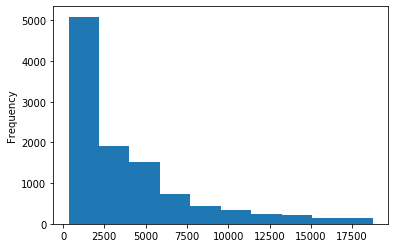

In [123]:
df_test["price"].plot(kind = "hist")

-0.016461213065010374
0.9871416693222155


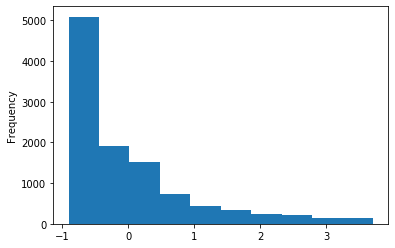

In [126]:
print(df_test_nor["price"].mean())
print(df_test_nor["price"].std())
df_test_nor["price"].plot(kind = "hist")